In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score
import warnings

In [4]:
data = pd.read_csv('Song_features.csv') 
x = data.loc[:, 'tempo':].values

In [5]:
# DATA STANDARDISATION:
stdScaler = StandardScaler()
stdScaler.fit(x)
std_data = pd.DataFrame(stdScaler.transform(x), columns=data.loc[:,'tempo':].columns)

In [6]:
Nstd_PC = 20
std_pca = PCA(n_components=Nstd_PC)
std_PCs = std_pca.fit_transform(std_data.values)
std_PCs = pd.DataFrame(data = std_PCs) 
std_PCs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.949010,-6.637912,-6.326941,-3.121026,1.212018,1.543446,6.489536,1.702186,0.043196,0.906843,-3.729916,-1.653350,0.816404,-2.335464,3.148383,1.763765,0.536452,-1.826318,1.002130,1.030182
1,-9.304174,12.503446,-0.411879,-8.266778,1.004969,-1.474784,-1.190529,0.156566,5.624633,4.975148,0.460771,1.403371,1.720663,-2.216792,2.015820,-2.911888,0.055739,0.016779,-1.101913,-0.125000
2,-11.150187,-3.110016,1.762764,-4.441557,1.101129,-1.982682,-2.183433,-2.249320,-3.033199,-1.813544,-3.836666,-0.642614,0.430868,4.663663,0.238777,-3.672365,-0.801124,-0.231430,0.797256,-2.122432
3,-12.749020,3.469745,5.457000,0.150668,2.705103,0.355957,0.349210,-1.899881,-5.462364,-2.022225,-0.158673,0.722462,4.474381,1.354719,-0.370719,-2.725367,-0.887704,0.120981,0.041293,1.309578
4,-0.043853,-3.861891,2.471014,4.622869,1.770259,1.048257,-1.493373,-0.661115,3.421099,2.275034,-1.571599,-1.702444,-0.194241,-0.383610,-0.949135,1.313612,-0.628754,-0.565054,-0.054529,-0.396820


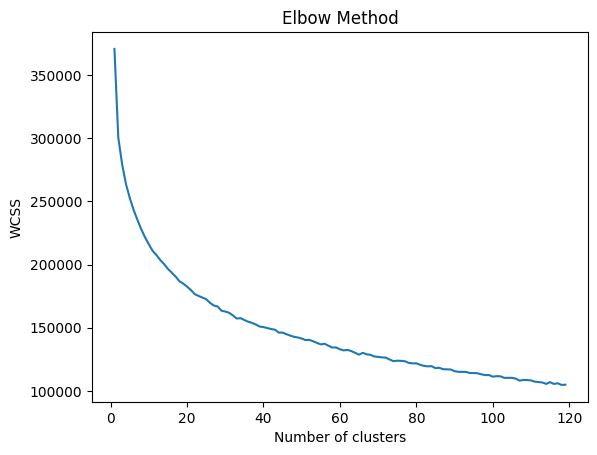

In [7]:
clust=120
wcss = []
for i in range(1, clust):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_PCs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, clust), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
silhouette_avg = []
for num_clusters in range(10,clust):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_PCs)
    silhouette_avg.append(silhouette_score(std_PCs, kmeans.predict(std_PCs)))

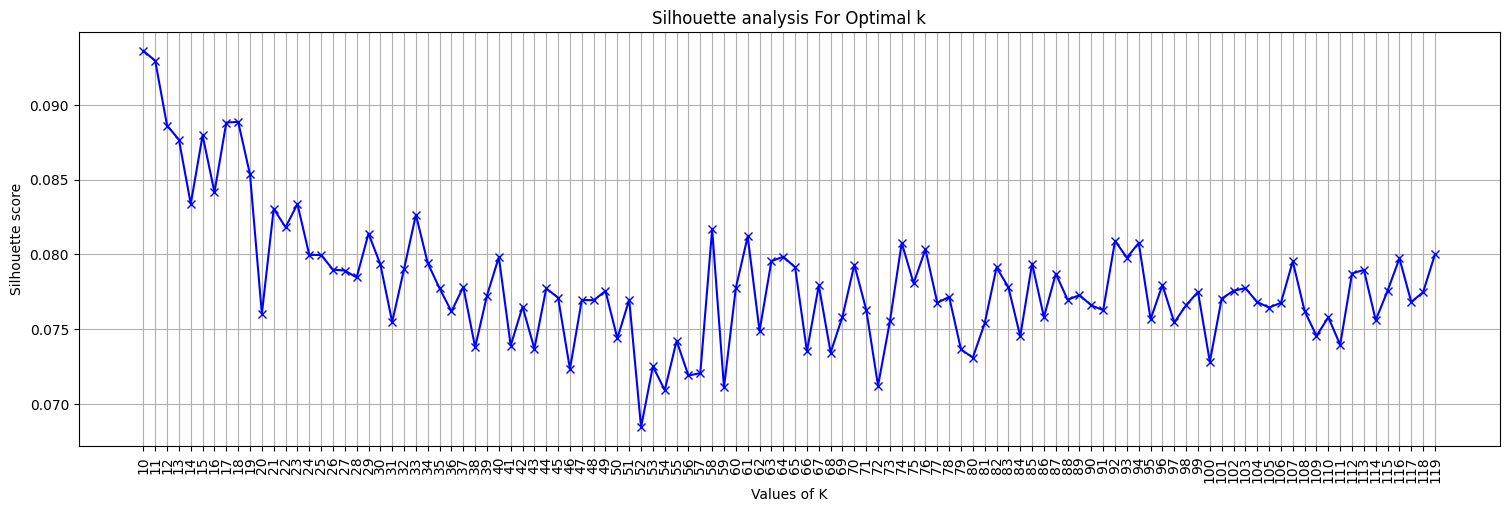

In [21]:
fig= plt.subplots(figsize = (15,5))
plt.plot(range(10,clust),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.xticks(range(10,clust))
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.grid()
plt.show()

In [16]:
n_clusters = 52
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
km = kmeans.fit(std_PCs)
cluster_map = pd.DataFrame()
cluster_map['song_name'] = data['song_name']
cluster_map['cluster'] = km.labels_
#cluster_map.head()

In [17]:
clusters = [[] for _ in range(n_clusters)]
for i, song in enumerate(data['song_name']):
    clusters.append(song)

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_map.sort_values(by=['cluster','song_name']))

                                              song_name  cluster
62                   Autumn_Leaves_-_Deluxe_Edition.mp3        0
122                                            Body.mp3        0
218                      Crowded_Room__feat__6LACK_.mp3        0
230                     Dancing_With_Our_Hands_Tied.mp3        0
262   Don_t_You__Taylor_s_Version___From_The_Vault_.mp3        0
280                                       Enchanted.mp3        0
312                                          Father.mp3        0
325                                         Fingers.mp3        0
336                                         Flicker.mp3        0
373                                        GOLDWING.mp3        0
383                                        Good_Guy.mp3        0
429                                 High_Infidelity.mp3        0
515               I_Miss_You__feat__Julia_Michaels_.mp3        0
520                                      I_See_Fire.mp3        0
516                      

In [27]:
warnings.filterwarnings("ignore")
inputsong=input('Enter a song: ')
distance = []
song = data[(data.song_name == inputsong)].head(1).values[0]
rec = data[data.song_name != inputsong]
for songs in rec.values:
    d = 0
    for col in np.arange(len(rec.columns)):
        if not col in [0]:
            d = d + np.absolute(float(song[col]) - float(songs[col]))
    distance.append(d)
rec['distance'] = distance
rec = rec.sort_values('distance')
print('Top 10 recommendations for', inputsong, 'are:')
columns = ['song_name']
rec[columns][:10]

Top 10 recommendations for Perfect.mp3 are:


,song_name
381,Good_For_You.mp3
711,Naturally.mp3
236,Dear_John.mp3
336,Flicker.mp3
850,Ronan__Taylor_s_Version_.mp3
733,Nobody_Like_You.mp3
520,I_See_Fire.mp3
418,Heart_By_Heart.mp3
945,Still_Have_Me.mp3
20,All_of_the_Stars.mp3
